# Logistic regression

在这部分的练习中，你将建立一个逻辑回归模型来预测一个学生是否能进入大学。假设你是一所大学的行政管理人员，你想根据两门考试的结果，来决定每个申请人是否被录取。你有以前申请人的历史数据，可以将其用作逻辑回归训练集。对于每一个训练样本，你有申请人两次测评的分数以及录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "./ex2/ex2data1.txt"
data = pd.read_csv(path, names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


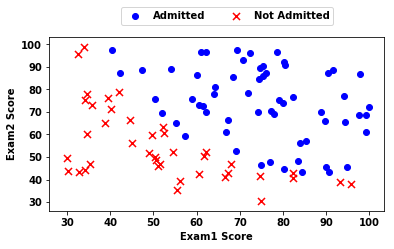

In [6]:
# isin()接受一个列表，判断该列中元素是否在列表中
positive = data[data.admitted.isin(['1'])] # adnitted = 1
negative = data[data.admitted.isin(['0'])] # admitted = 0

fig = plt.figure()
ax = plt.axes()
ax.scatter(positive['exam1'], positive['exam2'], c='b' ,label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')

# 设置图例显示在图的上方
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height * 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)

ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

In [7]:
# 上图观察来看，发现有一个清晰的决策边界。现在我们需要实现逻辑回归，那样就可以训练一个模型来预测结果

# Sigmoid function

logistic 假设函数h(x)  
$$ h_\theta(x) = g(\theta^Tx) = \frac {1}{1 + e^{-\theta^TX}}  $$
其中 g代表一个常用的logistic function为S形函数（Sigmoid function）  
$$ g(z) = \frac {1}{1 + e^{-z}}  $$

In [8]:
# sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

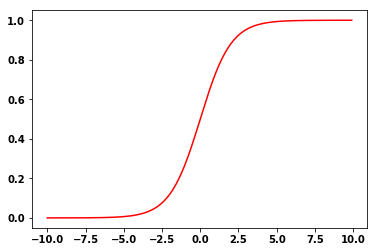

In [9]:
x1 = np.arange(-10, 10, 0.1)
plt.plot(x1, sigmoid(x1),c='r')
plt.show()

# Cost function

### 线性回归
损失函数
$$ lost(h_\theta(x), y) =  \frac{1}{2}(h_\theta(x^{(i)}) - y^{(i)}) ^2  $$  
求偏导
$$ \frac{\partial }{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} $$  
梯度下降
$$ \theta_j = \theta_j - \alpha \frac{\partial }{\partial \theta_j}J(\theta) $$

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} $$

### 逻辑回归
$$ h_\theta(x) = g(\theta^Tx) $$

$$
	lost(h_\theta(x), y) = 
	\begin{cases}
	-\log(h_\theta(x)), & \text{if y = 1} \\
	-\log(1 - h_\theta(x)), & \text{if y = 0}
    \end{cases}
$$  

$$ J(\theta) =  -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))]  $$  

In [10]:
# 代价函数
def cost(theta, X, y):
    part1 = (-y) * np.log(sigmoid(X @ theta))
    print(part1)
    part2 = (1 - y) * np.log(1 - sigmoid(X @ theta))
    return np.mean(part1 - part2)

In [11]:
if 'Ones' not in data.columns:
    data.insert(0, 'Ones', 1)

# Set Training Data features X and y (target variable)
# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]
# X = np.matrix(X.values) # 矩阵化
# y = np.matrix(y.values) # 矩阵化

## 为什么这么设置，X为矩阵数据，y为数组而不是矩阵(与线性回归一样)，theta为数组而不是矩阵， 与后续高级算法代入有关系，代价函数和梯度计算不影响
X = data.iloc[:, :-1].as_matrix()  # Convert the frame to its Numpy-array representation.
y = data.iloc[:, -1].as_matrix()  # Return is NOT a Numpy-matrix, rather, a Numpy-array.

theta = np.zeros(X.shape[1])

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [12]:
# 查看维度
X.shape , y.shape, theta.shape

((100, 3), (100,), (3,))

In [13]:
cost(theta, X, y)

[-0.         -0.         -0.          0.69314718  0.69314718 -0.
  0.69314718  0.69314718  0.69314718  0.69314718 -0.         -0.
  0.69314718  0.69314718 -0.          0.69314718  0.69314718 -0.
  0.69314718  0.69314718 -0.          0.69314718 -0.         -0.
  0.69314718  0.69314718  0.69314718 -0.         -0.         -0.
  0.69314718  0.69314718 -0.          0.69314718 -0.         -0.
 -0.          0.69314718 -0.         -0.          0.69314718 -0.
  0.69314718 -0.         -0.         -0.          0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718 -0.
 -0.         -0.          0.69314718 -0.          0.69314718  0.69314718
  0.69314718 -0.         -0.         -0.         -0.         -0.
  0.69314718 -0.          0.69314718  0.69314718 -0.          0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
 -0.         -0.          0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718 -0.          0.69314718  

0.6931471805599453

In [14]:
# 需要注意@ 矩阵相乘问题

# a = [[1, 1], 
#      [0, 1]]
# b = [[4, 1], 
#      [2, 2]]
# np.matmul(a, b) # 矩阵相乘

# c = [[1, 0], 
#      [0, 1]]
# d = [[4,1]]
# np.matmul(c,d)  # 不行

# e = [[1, 2], 
#      [1, 1]]
# f = [4, 1]
# np.matmul(e, f) # 可以的

In [15]:
# a = np.array([1,2, 3])
# b = np.array([3,4,5])
# a * b

# Gradient

这是批量梯度下降（batch gradient descent）  
转化为向量化计算： 
$$ \frac{1}{m} X^T( Sigmoid(X\theta) - y ) $$

$$ \frac{\partial }{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} $$ 

In [16]:
# 求偏导
def partial(theta, X, y):
    return X.T@(sigmoid(X@theta) - y) / len(X)

In [17]:
partial(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# Learning θ parameters

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算梯度。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数
。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。
我们使用的是高级优化算法，运行速度通常远远超过梯度下降。方便快捷。
只需传入cost函数，已经所求的变量theta，和梯度。cost函数定义变量时变量tehta要放在第一个，若cost函数只返回cost，则设置fprime=gradient。

In [18]:
import scipy.optimize as opt
# 这里使用fimin_tnc或者minimize方法来拟合，minimize中method可以选择不同的算法来计算，其中包括TNC
# func表示代价函数（参数格式为theta， X, y）
# fprime表示求偏导函数(参数格式为theta， X, y）
result = opt.fmin_tnc(func=cost, x0=theta, fprime=partial, args=(X, y))
result

[-0.         -0.         -0.          0.69314718  0.69314718 -0.
  0.69314718  0.69314718  0.69314718  0.69314718 -0.         -0.
  0.69314718  0.69314718 -0.          0.69314718  0.69314718 -0.
  0.69314718  0.69314718 -0.          0.69314718 -0.         -0.
  0.69314718  0.69314718  0.69314718 -0.         -0.         -0.
  0.69314718  0.69314718 -0.          0.69314718 -0.         -0.
 -0.          0.69314718 -0.         -0.          0.69314718 -0.
  0.69314718 -0.         -0.         -0.          0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718 -0.
 -0.         -0.          0.69314718 -0.          0.69314718  0.69314718
  0.69314718 -0.         -0.         -0.         -0.         -0.
  0.69314718 -0.          0.69314718  0.69314718 -0.          0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
 -0.         -0.          0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718 -0.          0.69314718  

(array([-25.16131853,   0.20623159,   0.20147149]), 36, 0)

In [19]:
# 另一种方法
# func表示代价函数（参数格式为theta， X, y）
# jar表示求偏导函数(参数格式为theta， X, y）
# res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='TNC', jac=partial)
# res
# help(opt.minimize)
# res.x

In [20]:
cost(result[0], X, y)

[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  9.62144068e-03
  1.80287417e-03 -0.00000000e+00  1.02238465e-03  8.59846466e-01
  2.90022477e-04  3.07357090e-01 -0.00000000e+00 -0.00000000e+00
  7.30124410e-04  1.46065735e-04 -0.00000000e+00  1.92242627e-02
  8.49293750e-01 -0.00000000e+00  2.93500258e-04  5.54636874e-01
 -0.00000000e+00  1.37369890e-03 -0.00000000e+00 -0.00000000e+00
  8.15491368e-03  1.56596933e-01  5.10327878e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.08553649e-01  1.91447506e-02
 -0.00000000e+00  9.36650046e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.25136618e-02 -0.00000000e+00 -0.00000000e+00
  3.01495969e-02 -0.00000000e+00  5.38660776e-04 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  7.03287046e-03  3.81924142e-06
  7.95400787e-04  9.23924876e-06  1.89501280e-03  4.99637589e-04
  9.98027573e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.43380210e-04 -0.00000000e+00  1.46095372e-02  4.28053793e-03
  4.68462639e-04 -0.00000

0.203497701589475

# Evaluating logistic regression

学习好了参数θ后，我们来用这个模型预测某个学生是否能被录取。

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。

逻辑回归模型的假设函数：
$$ h_\theta(x) = \frac {1}{1 + e^{(-\theta^Tx)}}  $$

In [21]:
# 规则如下
# 当h(x) >= 0.5时，预测y = 1
# 当h(x) < 0.5时，预测y = 0

In [22]:
# 使用学习好的参数theta，计算得到h(x)
def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]

In [23]:
# 计算准确比例
final_theta = result[0] #梯度
predictions = predict(final_theta, X)

correct = [1 if a == b else 0 for a, b in zip(predictions, y)]
accuracy = sum(correct) / len(X)
accuracy

0.89

In [24]:
# 用skearn中的方法来检验。
from sklearn.metrics import classification_report
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.90      0.91        61

   micro avg       0.89      0.89      0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



# Decision boundary（决策边界）

$ X * 0 = 0 $  
$ \theta_0 + x_1\theta_1 + x_2\theta_2 = 0 $

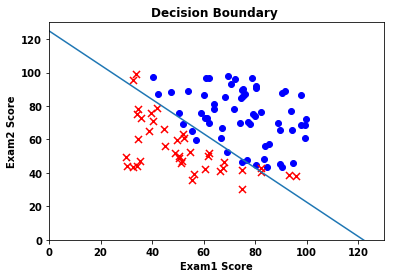

In [25]:
x1 = np.arange(130, step=0.1)
x2 = - (final_theta[0] + x1 * final_theta[1]) / final_theta[2]

fig = plt.figure()
ax = plt.axes()
ax.scatter(positive['exam1'], positive['exam2'], c='b', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s = 50, c='r', marker='x', label='Not Admitted')
plt.plot(x1, x2)
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_title('Decision Boundary ')
plt.show()

# Regularized logistic regression

在训练的第二部分，我们将要通过加入正则项提升逻辑回归算法。简而言之，正则化是成本函数中的一个术语，它使算法更倾向于“更简单”的模型
（在这种情况下，模型将更小的系数）。这个理论助于减少过拟合，提高模型的泛化能力。

想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果。对于这两次测试，你想决定是否芯片要被接受或抛弃。为了帮助你做出艰难的决定，  
你拥有过去芯片的测试数据集，从其中你可以构建一个逻辑回归模型。

## Visualizing the data

In [26]:
data2 = pd.read_csv('./ex2/ex2data2.txt', names=['test1', 'test2', 'accepted'])
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


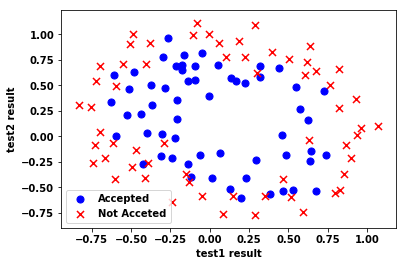

In [27]:
def plot_data():
    positive = data2[data2.accepted.isin(['1'])]
    negative = data2[data2.accepted.isin(['0'])]

    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Not Acceted')
    ax.legend()
    ax.set_xlabel('test1 result')
    ax.set_ylabel('test2 result')
    plt.show()

plot_data()

In [28]:
#注意到其中的正负两类数据并没有线性的决策界限。因此直接用logistic回归在这个数据集上并不能表现良好，因为它只能用来寻找一个线性的决策边界。

## Feature mapping

#### 多项式特征映射
一个拟合数据的更好的方法是从每个数据点创建更多的特征。

我们将把这些特征映射到所有的x1和x2的多项式项上，直到第六次幂。

In [29]:
# for i in 0..power
#       for p in 0..i:
#         output x1^(i-p) * x2^p```

In [30]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for p in np.arange(i + 1):
            data["f{}{}".format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)
    return pd.DataFrame(data)

In [31]:
x1 = data2['test1'].as_matrix()
x2 = data2['test2'].as_matrix()

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [32]:
_data2 = feature_mapping(x1, x2, power=6)
_data2.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


在这个高维特征向量上训练的logistic回归分类器将会有一个更复杂的决策边界，当我们在二维图中绘制时，会出现非线性。

虽然特征映射允许我们构建一个更有表现力的分类器，但它也更容易过拟合。在接下来的练习中，我们将实现正则化的logistic回归来拟合数据，并且可以看到
正则化如何帮助解决过拟合的问题。


## Regularized Cost function

$$ J(\theta) =  \frac{1}{m} \sum_{i=1}^m[- y^{(i)}\log(h_\theta(x^{(i)})) - (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2 $$  

In [33]:
# 注意：不惩罚第一项θ0 
# 做特征映射已经把偏置项加进去了，无需手动添加
X = _data2.as_matrix()
y = data2['accepted'].as_matrix()
theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape 

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


((118, 28), (118,), (28,))

In [34]:
# 加入正则项的代价函数
def cost_reg(theta, X, y, l=1):
    # 不惩罚第一项
    _theta = theta[1:]
    reg = (1 / (2 * len(X))) * (_theta @ _theta)
    return cost(theta, X, y) + reg

In [35]:
cost_reg(theta, X, y)

[ 0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.  

0.6931471805599454

## Regularized gradient

因为我们未对θ0 进行正则化，所以梯度下降算法将分两种情形：  
Repeat until convergence:  
$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0{(i)} $$
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} + \frac{\lambda}{m}\theta_j $$
Repeat

对上面的算法中 j=1,2,…,n 时的更新式子进行调整可得：
$$ \theta_j = \theta_j(1 - \alpha \frac{\lambda}{m}) + \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} $$

In [36]:
# 加上正则项的偏导数
def partial_reg(theta, X, y, l=1):
    reg = (1 / len(X))* theta
    reg[0] = 0 # 偏置项为0
    return partial(theta, X, y) + reg

In [37]:
partial_reg(theta, X, y, 1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## Learning parameters

In [38]:
result2 = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=partial_reg, args=(X, y, 2))
result2

[ 0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.  

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987398, -0.91743189,
        -1.43166928,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
        -1.4581701 , -0.05098418, -0.6155855 , -0.27469165, -1.19271297,
        -0.2421784 , -0.20603295, -0.04466179, -0.27778953, -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.29244874,  0.01555761,
        -0.32742407, -0.14389151, -0.92467487]), 32, 1)

In [39]:
# 可以使用高级Python库scikit-learn来解决这个问题

In [40]:
from sklearn import linear_model#调 用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y.ravel())

model.score(X, y)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8305084745762712

## Evaluating logistic regression

In [41]:
# 使用学习好的参数theta，计算得到h(x)
def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]

In [42]:
final_theta = result2[0]
predictions = predict(final_theta, X)
correct = [1 if a == b else 0 for a, b in zip(predictions, y)]
accuracy = sum(correct) / len(X)
accuracy

0.8305084745762712

In [43]:
# 用skearn中的方法来评估结果
from sklearn.metrics import classification_report
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        50
           1       0.91      0.78      0.84        68

   micro avg       0.83      0.83      0.83       118
   macro avg       0.83      0.84      0.83       118
weighted avg       0.84      0.83      0.83       118



## Decision boundary（决策边界）

In [44]:
# np.meshgrid( )
# 语法：[X,Y] = meshgrid(x,y)

# 作用：接受两个一维数组，并产生两个二维数组（对应于两个数组中所有的（x,y）对） 
#（将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制。）

In [45]:
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x)
xx.shape, yy.shape

((250, 250), (250, 250))

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


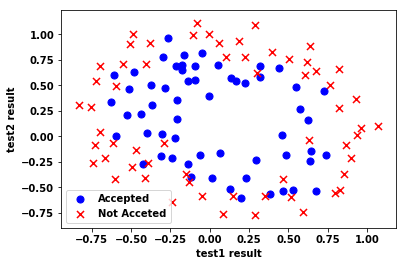

(-0.8, 1.2)

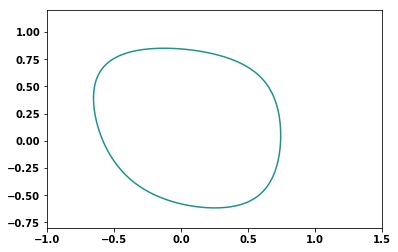

In [46]:
z = feature_mapping(xx.ravel(), yy.ravel(), 6).as_matrix()
z = z @ final_theta
z = z.reshape(xx.shape)

plot_data()
plt.contour(xx, yy, z, 0)
plt.ylim(-.8, 1.2)